In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
import seaborn as sb 

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#### 다크모드로 인한 plt 가시성 설정

In [17]:
plt.rcParams['font.family']='Malgun Gothic'
#그래프의 크기
plt.rcParams['figure.figsize']=12.8,10.8
#글자크기
plt.rcParams['font.size']=14
#폰트설정시 -가호 깨지는거 방지하기
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.facecolor']='white' #다크모드일때 그래프에 흰배경깔아줌

In [18]:
pwd

'C:\\Users\\medici\\Documents\\python\\opgg bg'

### 2020토너먼트 데이터 불러오기

In [19]:
df = pd.read_csv('./2020_torunaments.csv')

In [20]:
df

,dbnos,assists,boosts,damage_dealt,death_type,headshot_kills,heals,kill_place,kill_streaks,kills,...,walk_distance,weapons_acquired,win_place,match_mapName,match_duration,match_createdAt,roster_rank,roster_won,tournament_id,tournament_createdAt
0,1,0,2,178.786790,byplayer,0,7,20,1,1,...,706.84840,7,4,Miramar,1742,2020-12-19T07:39:25Z,4,False,as-pwi20,2020-12-19T07:04:54Z
1,0,0,1,0.000000,byplayer,0,1,33,0,0,...,630.31635,4,4,Miramar,1742,2020-12-19T07:39:25Z,4,False,as-pwi20,2020-12-19T07:04:54Z
2,1,0,1,100.000000,byplayer,0,3,34,0,0,...,1328.34330,3,4,Miramar,1742,2020-12-19T07:39:25Z,4,False,as-pwi20,2020-12-19T07:04:54Z
3,1,0,0,207.984300,byplayer,0,1,21,1,1,...,1109.39770,4,4,Miramar,1742,2020-12-19T07:39:25Z,4,False,as-pwi20,2020-12-19T07:04:54Z
4,1,0,3,189.195080,byplayer,1,6,25,1,1,...,1024.16360,3,8,Miramar,1742,2020-12-19T07:39:25Z,8,False,as-pwi20,2020-12-19T07:04:54Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135155,0,0,3,18.449999,byplayer,0,1,44,0,0,...,1137.94820,5,7,Miramar,1818,2020-01-10T13:16:32Z,7,False,kr-nr20,2020-01-08T11:45:46Z
135156,0,1,4,27.376270,byplayer,0,0,56,0,0,...,2369.78860,7,13,Miramar,1818,2020-01-10T13:16:32Z,13,False,kr-nr20,2020-01-08T11:45:46Z
135157,0,0,2,0.000000,byplayer,0,0,57,0,0,...,1164.91500,6,13,Miramar,1818,2020-01-10T13:16:32Z,13,False,kr-nr20,2020-01-08T11:45:46Z
135158,1,0,8,78.000000,byplayer,0,1,30,1,1,...,1480.25150,5,13,Miramar,1818,2020-01-10T13:16:32Z,13,False,kr-nr20,2020-01-08T11:45:46Z


### str열을 비롯한 일부 열들 drop

In [21]:
df=df.drop(['death_type','match_mapName','name','player_id','match_createdAt','roster_won','tournament_id','tournament_createdAt'],axis=1)

In [22]:
df

,dbnos,assists,boosts,damage_dealt,headshot_kills,heals,kill_place,kill_streaks,kills,longest_kill,...,road_kills,swim_distance,team_kills,time_survived,vehicle_destroys,walk_distance,weapons_acquired,win_place,match_duration,roster_rank
0,1,0,2,178.786790,0,7,20,1,1,4.594472,...,0,0.0,0,1673.792,0,706.84840,7,4,1742,4
1,0,0,1,0.000000,0,1,33,0,0,0.000000,...,0,0.0,0,1101.193,0,630.31635,4,4,1742,4
2,1,0,1,100.000000,0,3,34,0,0,0.000000,...,0,0.0,0,1089.458,0,1328.34330,3,4,1742,4
3,1,0,0,207.984300,0,1,21,1,1,104.266150,...,0,0.0,0,1106.039,0,1109.39770,4,4,1742,4
4,1,0,3,189.195080,1,6,25,1,1,227.473070,...,0,0.0,0,1453.595,0,1024.16360,3,8,1742,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135155,0,0,3,18.449999,0,1,44,0,0,0.000000,...,0,0.0,0,1533.183,0,1137.94820,5,7,1818,7
135156,0,1,4,27.376270,0,0,56,0,0,0.000000,...,0,0.0,0,1295.836,0,2369.78860,7,13,1818,13
135157,0,0,2,0.000000,0,0,57,0,0,0.000000,...,0,0.0,0,1120.662,0,1164.91500,6,13,1818,13
135158,1,0,8,78.000000,0,1,30,1,1,23.056494,...,0,0.0,0,1258.413,0,1480.25150,5,13,1818,13


### 결측값 확인

In [23]:
df.isnull().sum()

dbnos               0
assists             0
boosts              0
damage_dealt        0
headshot_kills      0
heals               0
kill_place          0
kill_streaks        0
kills               0
longest_kill        0
revives             0
ride_distance       0
road_kills          0
swim_distance       0
team_kills          0
time_survived       0
vehicle_destroys    0
walk_distance       0
weapons_acquired    0
win_place           0
match_duration      0
roster_rank         0
dtype: int64

### 시험용으로 사용할 속성들 결정

In [24]:
test_features = ['kills','assists','damage_dealt','time_survived','longest_kill']

In [25]:
test_df = pd.DataFrame(df, columns=test_features)

In [26]:
test_df

,kills,assists,damage_dealt,time_survived,longest_kill
0,1,0,178.786790,1673.792,4.594472
1,0,0,0.000000,1101.193,0.000000
2,0,0,100.000000,1089.458,0.000000
3,1,0,207.984300,1106.039,104.266150
4,1,0,189.195080,1453.595,227.473070
...,...,...,...,...,...
135155,0,0,18.449999,1533.183,0.000000
135156,0,1,27.376270,1295.836,0.000000
135157,0,0,0.000000,1120.662,0.000000
135158,1,0,78.000000,1258.413,23.056494


### kmeans

In [27]:
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=1000,random_state=0)
kmeans.fit(test_df)

KMeans(max_iter=1000, n_clusters=4, random_state=0)

In [28]:
display(kmeans.labels_)

array([1, 3, 3, ..., 3, 0, 3])

In [29]:
cen = kmeans.cluster_centers_
cen

array([[8.67332881e-01, 5.47637270e-01, 1.84664588e+02, 1.32877563e+03,
        6.02485547e+01],
       [2.21583518e+00, 1.23559400e+00, 4.15696705e+02, 1.67410354e+03,
        1.29026224e+02],
       [2.20260936e-01, 9.69877206e-02, 5.48136953e+01, 4.84518589e+02,
        7.71627335e+00],
       [4.10234690e-01, 2.41442025e-01, 9.50031796e+01, 9.82526067e+02,
        2.47241925e+01]])

In [30]:
test_df['cluster'] = kmeans.labels_

In [31]:
pca =  PCA(n_components=2)
pca_transformed = pca.fit_transform(df)

In [32]:
test_df['pca_x'] = pca_transformed[:, 0]
test_df['pca_y'] = pca_transformed[:, 1]
test_df.head(5)

,kills,assists,damage_dealt,time_survived,longest_kill,cluster,pca_x,pca_y
0,1,0,178.78679,1673.792,4.594472,1,6074.592216,-344.730348
1,0,0,0.00000,1101.193,0.000000,3,6002.839508,-664.966164
2,0,0,100.00000,1089.458,0.000000,3,5534.377464,-23.260467
3,1,0,207.98430,1106.039,104.266150,3,5321.474528,-197.100689
4,1,0,189.19508,1453.595,227.473070,0,6306.992755,-135.282716


In [33]:
marker0_ind = test_df[test_df['cluster']==0].index
marker1_ind = test_df[test_df['cluster']==1].index
marker2_ind = test_df[test_df['cluster']==2].index
marker3_ind = test_df[test_df['cluster']==3].index
#marker4_ind = test_df[test_df['cluster']==4].index

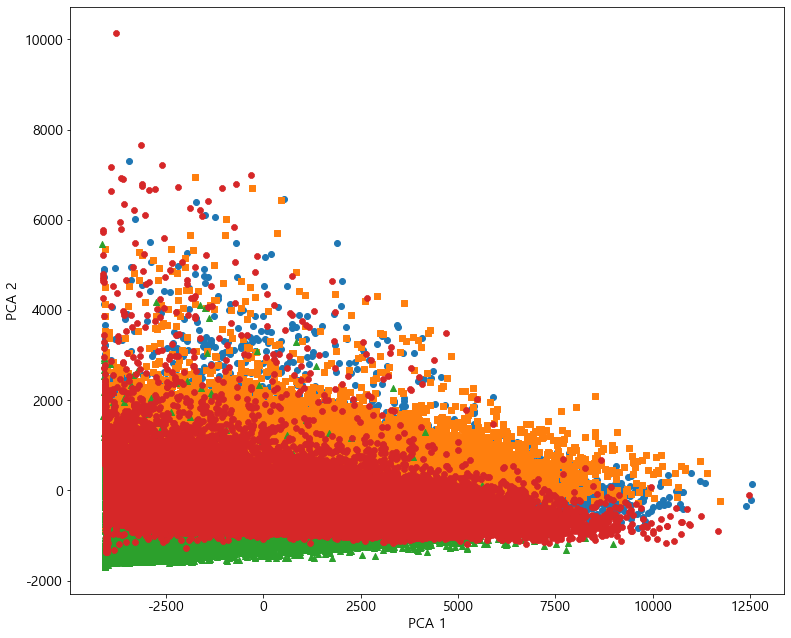

In [34]:
plt.scatter(x=test_df.loc[marker0_ind,'pca_x'], y=test_df.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=test_df.loc[marker1_ind,'pca_x'], y=test_df.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=test_df.loc[marker2_ind,'pca_x'], y=test_df.loc[marker2_ind, 'pca_y'], marker='^')
plt.scatter(x=test_df.loc[marker3_ind,'pca_x'], y=test_df.loc[marker3_ind, 'pca_y'], marker='8')
#plt.scatter(x=test_df.loc[marker4_ind,'pca_x'], y=test_df.loc[marker4_ind, 'pca_y'], marker='v')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

In [35]:
data=[]
for n in range(1,11):
    model=KMeans(n_clusters=n)
    km=model.fit(df)
    data.append(km.inertia_)

In [36]:
data

[995807955058.7513,
 393899994989.09265,
 246541685906.74307,
 184449028386.32294,
 152801950442.84204,
 131927227955.46657,
 116064882100.19218,
 104500824698.95285,
 95039879489.44952,
 87652843981.14795]

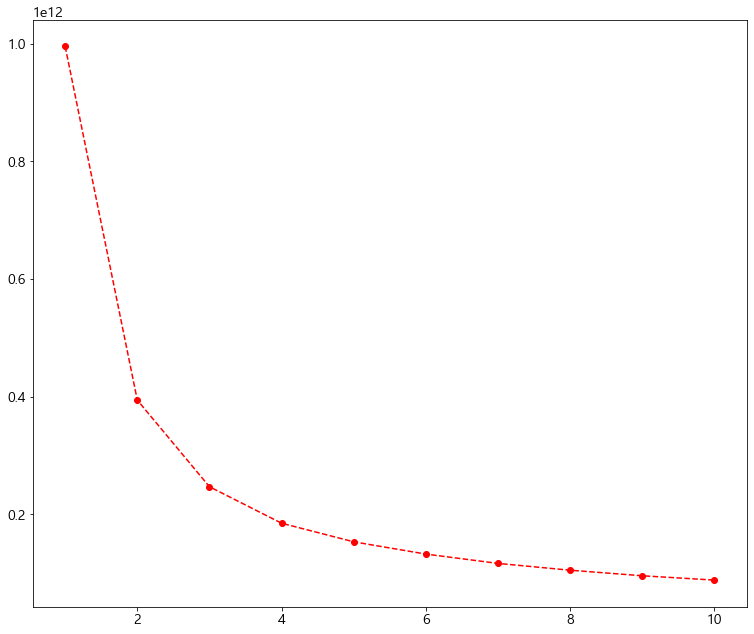

In [37]:
plt.plot(range(1,11),data,'ro--')
plt.show()

### standard scaling 후에 kmeans

In [38]:
scaler = StandardScaler()

model = KMeans(n_clusters=5,init='k-means++',max_iter=1000,random_state=0)

pipeline = make_pipeline(scaler,model)



In [45]:
kmeans_model=pipeline.fit(test_df)
kmeans_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans',
                 KMeans(max_iter=1000, n_clusters=5, random_state=0))])

In [46]:
display(model.labels_)

array([0, 1, 1, ..., 1, 0, 1])

In [47]:
cen = model.cluster_centers_
cen

array([[-0.27546804, -0.04903392, -0.04474112,  0.56753592, -0.36244365,
        -0.99685048,  0.20252133,  0.34788769],
       [-0.41709777, -0.33351446, -0.53154735, -0.48265766, -0.39833835,
         1.25764638,  0.22307563, -0.34570772],
       [ 1.02985815, -0.09271104,  0.70591377,  0.71277432,  1.73203625,
        -0.59774927,  0.02967745,  0.61136704],
       [ 1.47689487,  1.93371943,  1.78390219,  1.13499183,  0.73870531,
        -0.43185835, -0.04064812,  1.05050315],
       [-0.53205439, -0.48589046, -0.72345844, -1.69143975, -0.5066803 ,
         0.52325191, -0.86499861, -1.33861663]])

In [49]:
test_df

,kills,assists,damage_dealt,time_survived,longest_kill,cluster,pca_x,pca_y
0,1,0,178.786790,1673.792,4.594472,1,6074.592216,-344.730348
1,0,0,0.000000,1101.193,0.000000,3,6002.839508,-664.966164
2,0,0,100.000000,1089.458,0.000000,3,5534.377464,-23.260467
3,1,0,207.984300,1106.039,104.266150,3,5321.474528,-197.100689
4,1,0,189.195080,1453.595,227.473070,0,6306.992755,-135.282716
...,...,...,...,...,...,...,...,...
135155,0,0,18.449999,1533.183,0.000000,0,8605.561629,-34.743581
135156,0,1,27.376270,1295.836,0.000000,0,-1642.104334,1017.450114
135157,0,0,0.000000,1120.662,0.000000,3,-1308.272637,-149.665829
135158,1,0,78.000000,1258.413,23.056494,0,-1641.843686,203.108309


#### ▲test_df에 다른값들이 들어있어서 정확하지 않다!

### 계층적 군집화 (는 메모리 에러가 나서 진행이 안된다...) 
 -  계층적 군집화는 다량의 데이터셋에는 적합하지않다(https://stackoverflow.com/questions/10115525/memory-error-when-calculating-pairwise-distances-in-scipy)

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [15]:
linked = linkage(test_df, 'single')

MemoryError: Unable to allocate 68.1 GiB for an array with shape (9134045220,) and data type float64

### kMedoids(중간자군집화)를 시도해 보았으나 똑같이 메모리 에러가 난다..

In [29]:
from sklearn_extra.cluster import KMedoids

conda install -c conda-forge scikit-learn-extra

In [30]:
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(test_df)

MemoryError: Unable to allocate 136. GiB for an array with shape (135160, 135160) and data type float64

In [31]:
test_df.shape

(135160, 8)